In [1]:
!pip install -e "git+https://github.com/daffarobani/smt-explainability.git"#egg=smt-ex
!pip install sobolsampling

Obtaining smt-ex from git+https://github.com/daffarobani/smt-explainability.git#egg=smt-ex
  Cloning https://github.com/daffarobani/smt-explainability.git to ./src/smt-ex
  Running command git clone --filter=blob:none --quiet https://github.com/daffarobani/smt-explainability.git /Users/muhammaddaffarobani/Documents/personal_research/smt-explainability/smt_ex/examples/src/smt-ex
  Resolved https://github.com/daffarobani/smt-explainability.git to commit 5f7e1fe8acd2f4aa802f3d4242768c5d8ee7c48b
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of smt-ex to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 2.7.0 Requires-Python >=3.9
ERROR: Could not find a version that satisfie

In [1]:
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS

from smt_ex.pdp.partial_dependence_display import PartialDependenceDisplay
from smt_ex.pdp.pd_feature_importance_display import PDFeatureImportanceDisplay
from smt_ex.pdp.pd_interaction_display import PDFeatureInteractionDisplay

from sklearn.metrics import mean_squared_error

In [10]:
ndoe = 100
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8 * ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

## config
feature_names = [
    r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
    r'$q$', r'$\lambda$', r'$t_{c}$', r'$N_{z}$', 
    r'$W_{dg}$', r'$W_{p}$',
]

class GroundTruthModel:
    def predict_values(self, X):
        return fun(X)
    
# kriging model
sm = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
sm.set_training_values(
    X_tr,
    y_tr
    )

sm.train()

print("Surrogate model")
y_pred = sm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

# ground truth model
gtm = GroundTruthModel()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  8.5636020
Surrogate model
RMSE: 0.6717
rRMSE: 0.0025


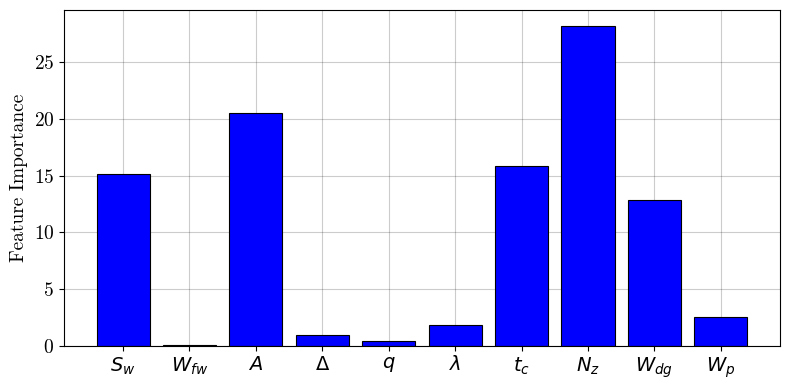

In [11]:
model = gtm

gt_pdd_importance = PDFeatureImportanceDisplay.from_surrogate_model(model, X_tr, feature_names=feature_names)
gt_pdd_importance_fig = gt_pdd_importance.plot(sort=False, figsize=[8, 4])
gt_pdd_importance_fig

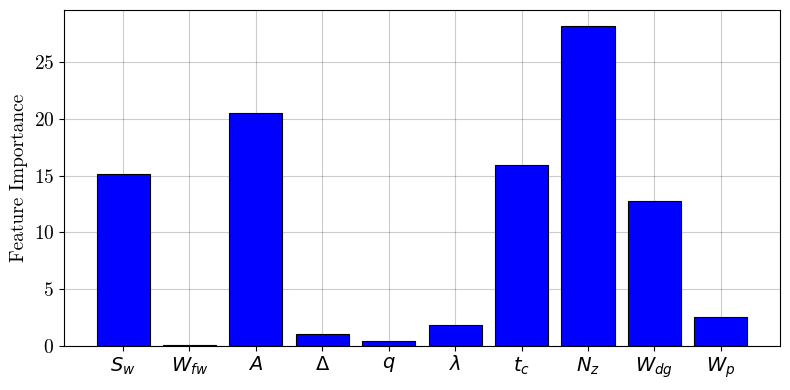

In [12]:
model = sm

pdd_importance = PDFeatureImportanceDisplay.from_surrogate_model(model, X_tr, feature_names=feature_names)
pdd_importance_fig = pdd_importance.plot(sort=False, figsize=[8, 4])
pdd_importance_fig

CPU times: user 421 ms, sys: 10.4 ms, total: 431 ms
Wall time: 434 ms


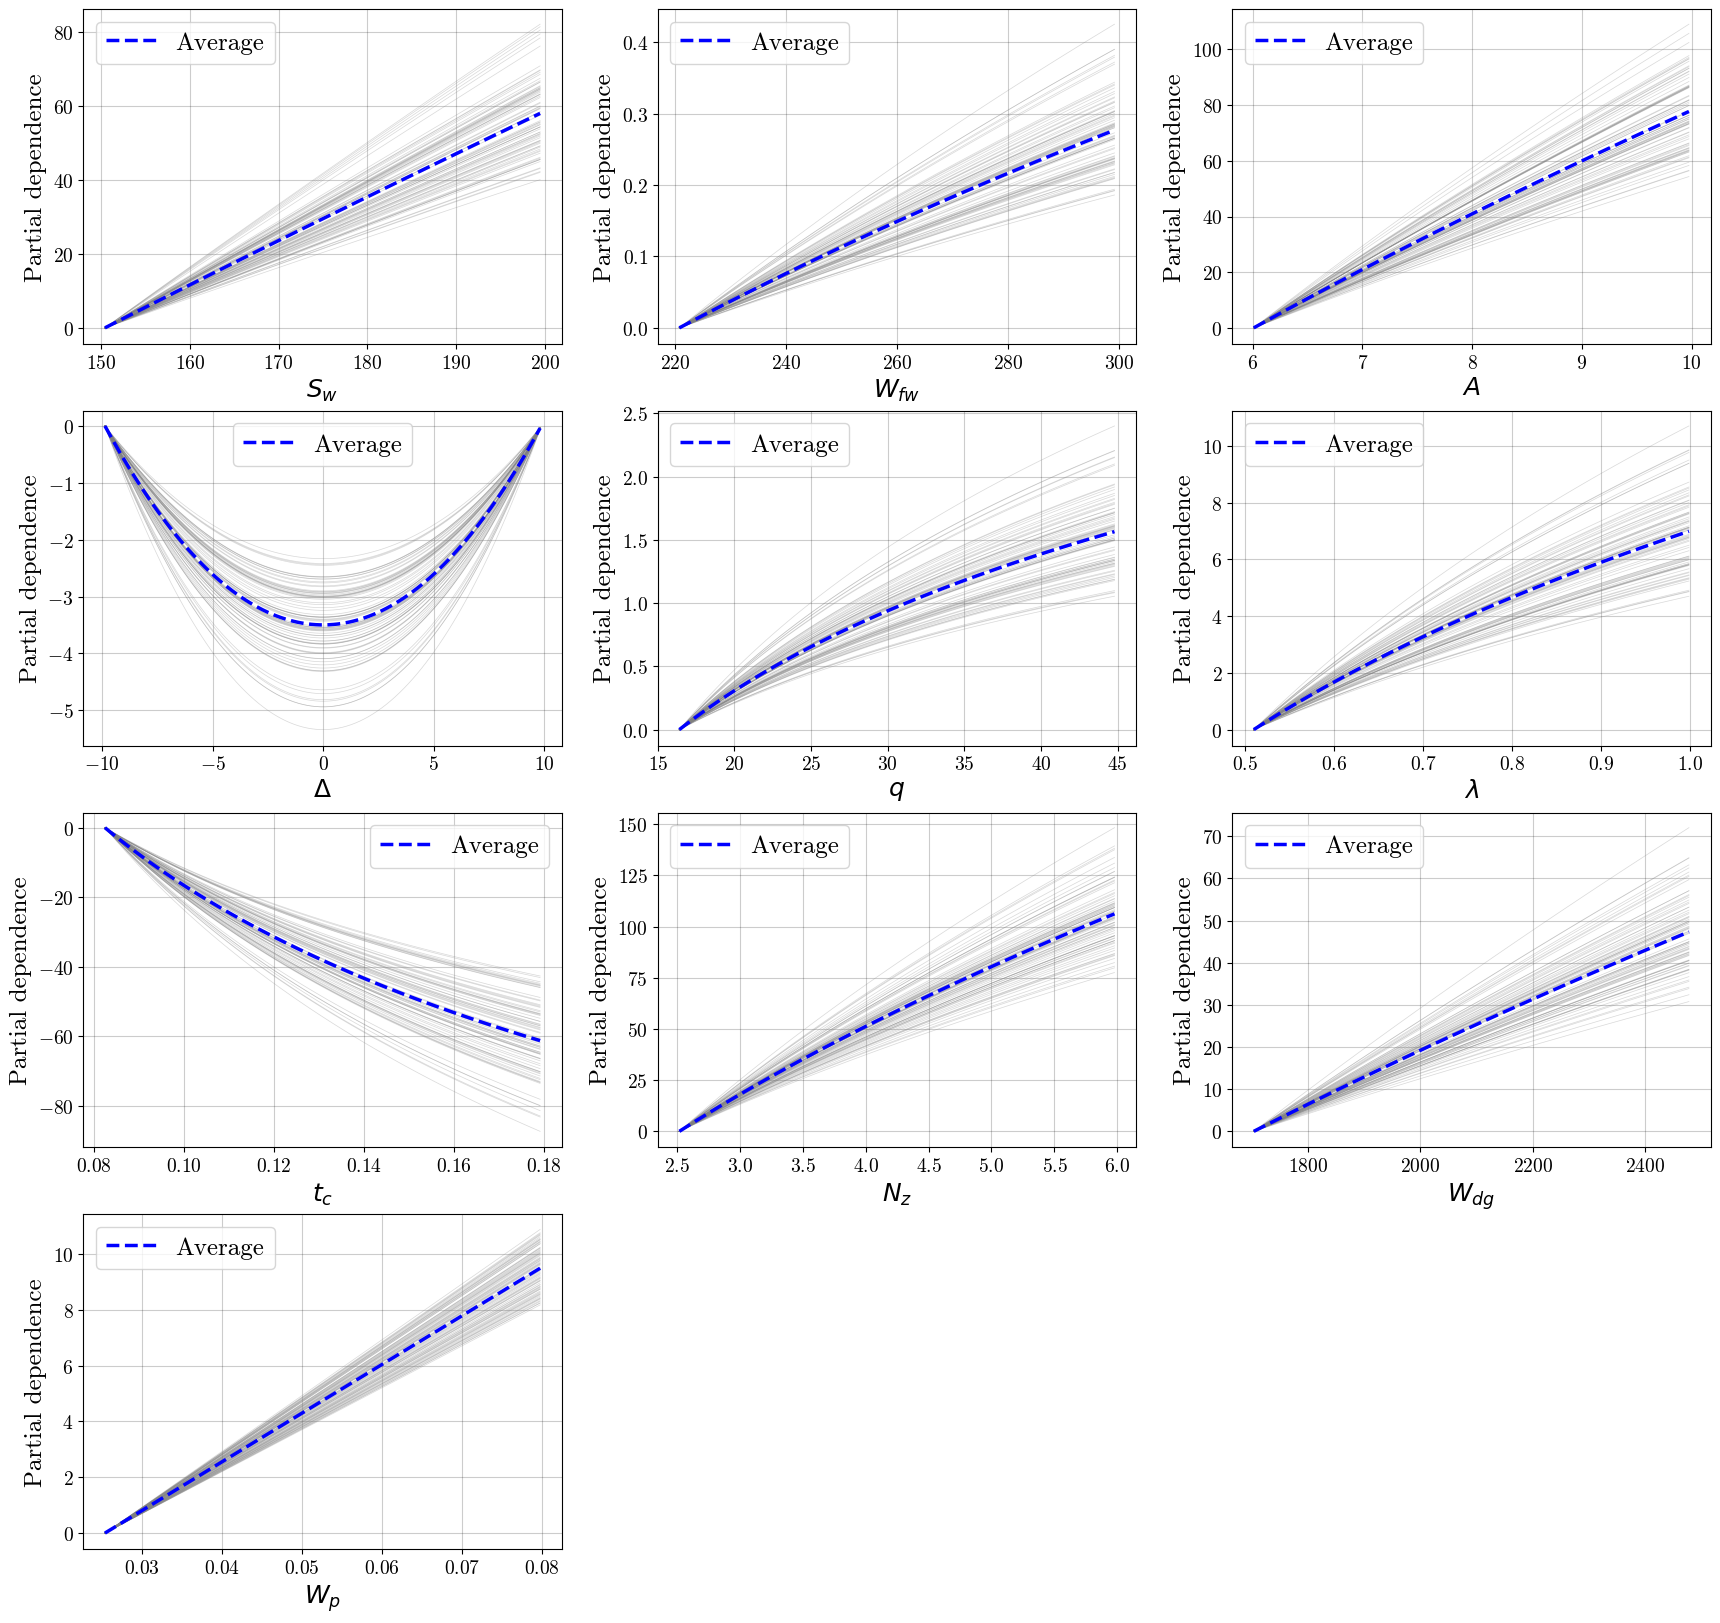

In [18]:
%%time
model = gtm
features = [i for i in range(X_tr.shape[1])]

gt_pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
    percentiles=(0.01, 0.99),
)
gt_pdd_fig_1d = gt_pdd.plot(centered=True)
gt_pdd_fig_1d

CPU times: user 503 ms, sys: 31.2 ms, total: 534 ms
Wall time: 538 ms


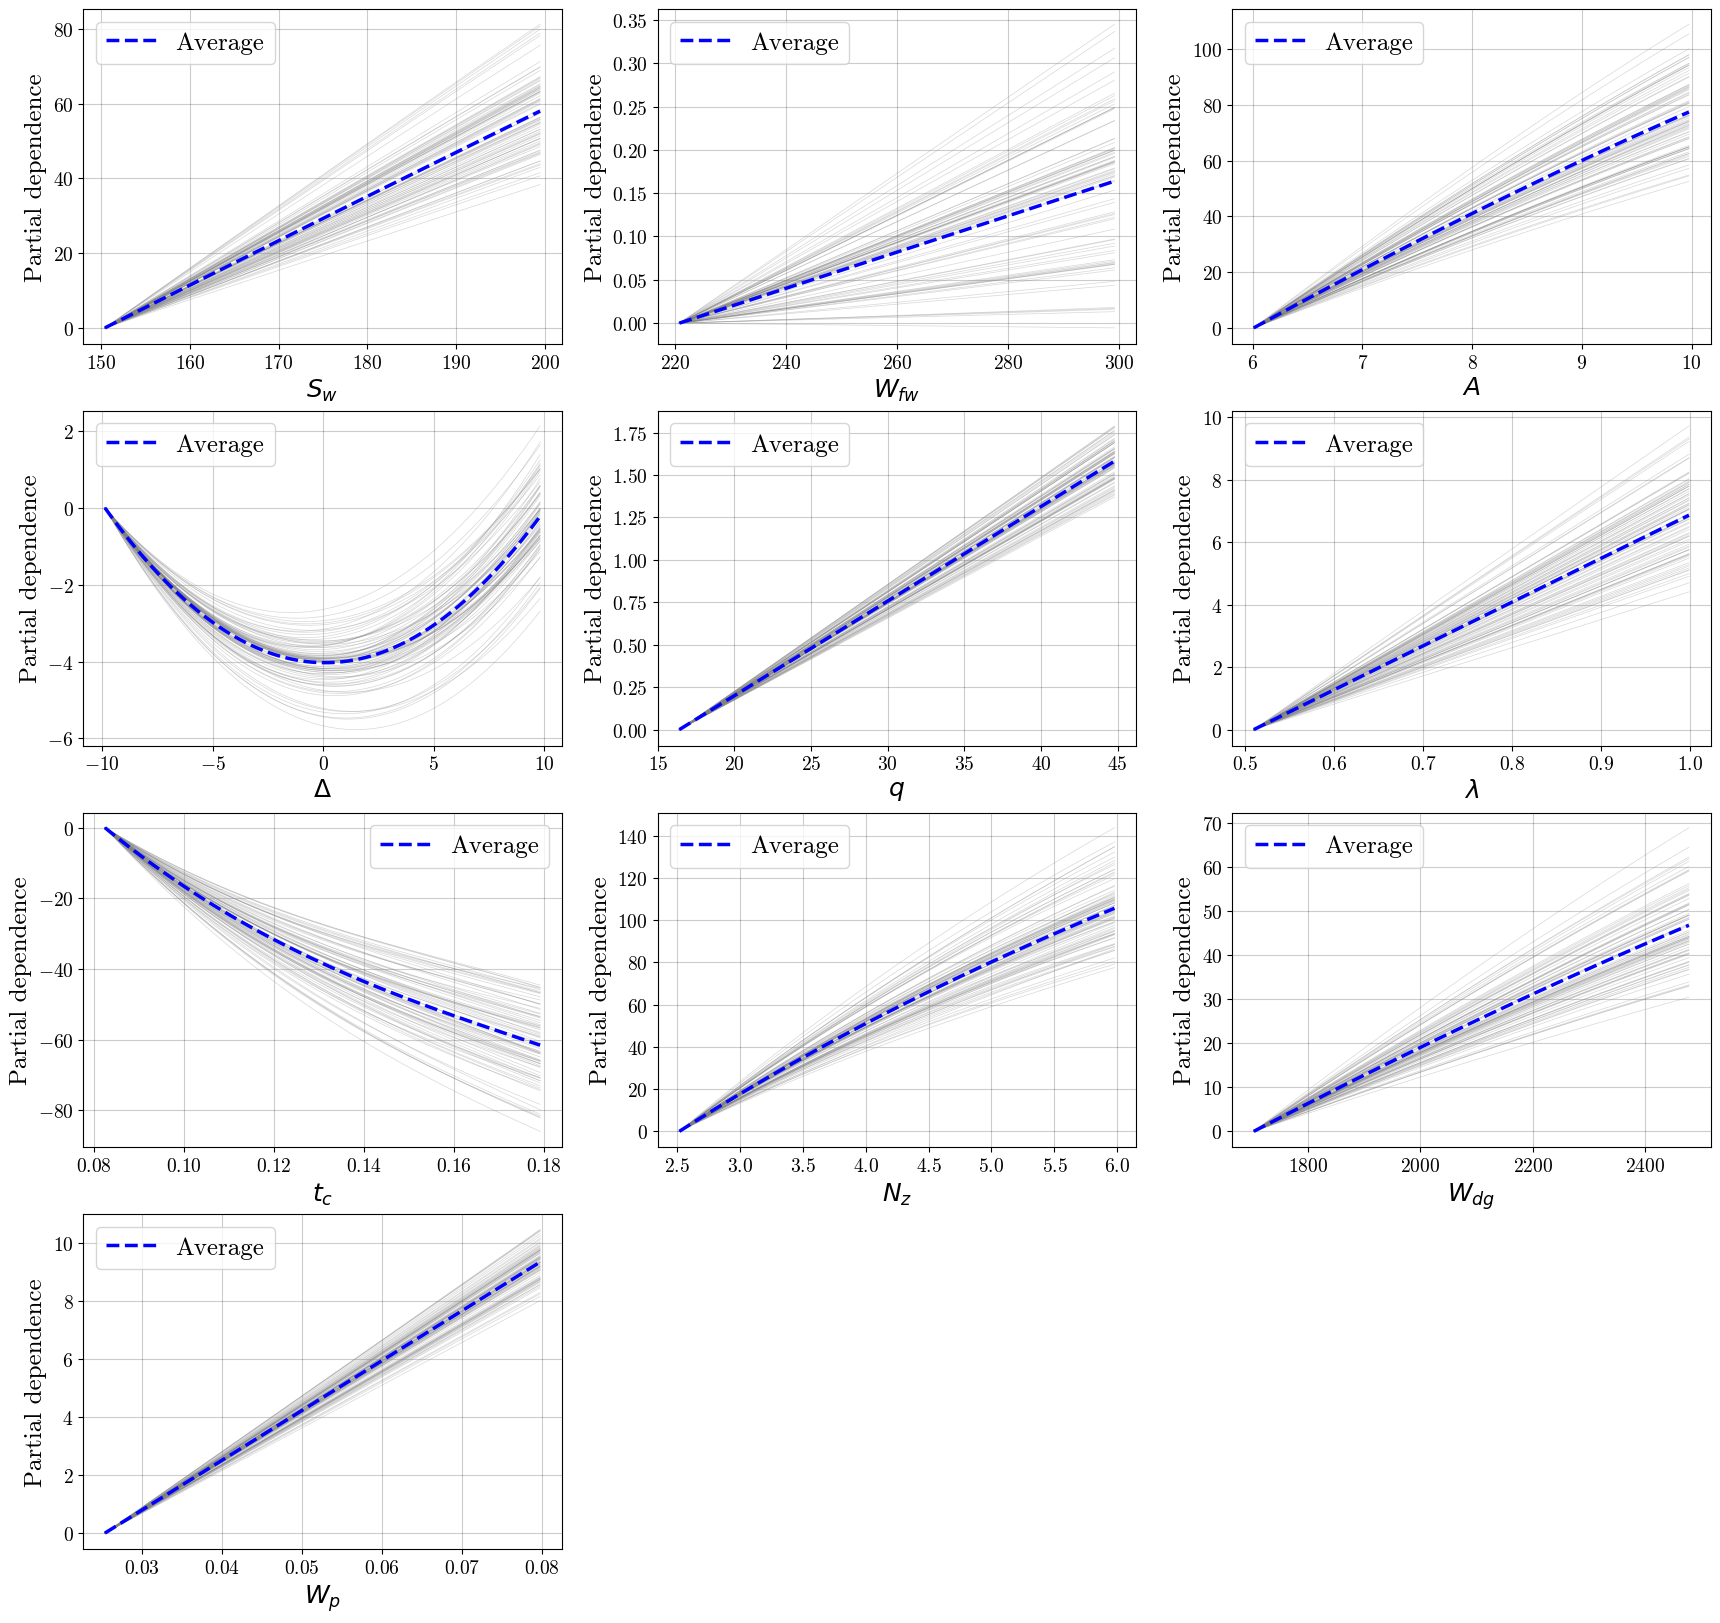

In [19]:
%%time
model = sm
features = [i for i in range(X_tr.shape[1])]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
    percentiles=(0.01, 0.99),
)
pdd_fig_1d = pdd.plot(centered=True)
pdd_fig_1d

CPU times: user 6.85 s, sys: 81.5 ms, total: 6.93 s
Wall time: 7.1 s


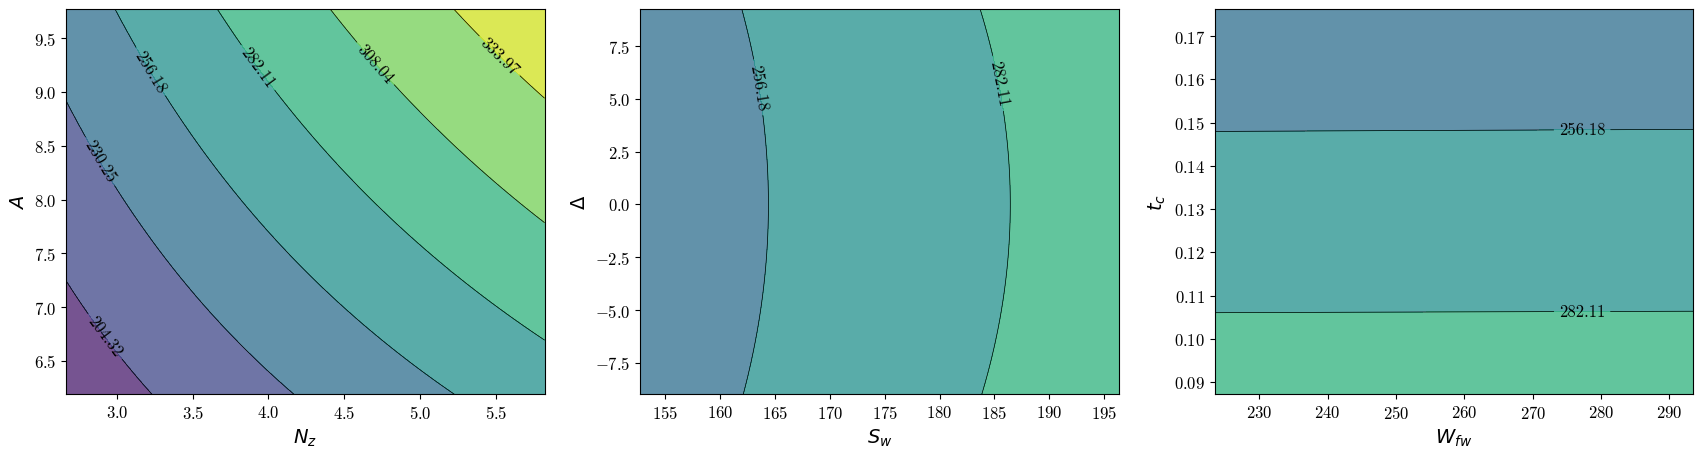

In [16]:
%%time
model = gtm
X = X_tr
features = [(7, 2), (0, 3), (1, 6)]

gt_pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
)
gt_pdd_fig_2d = gt_pdd.plot()
gt_pdd_fig_2d

CPU times: user 10.1 s, sys: 777 ms, total: 10.9 s
Wall time: 11.5 s


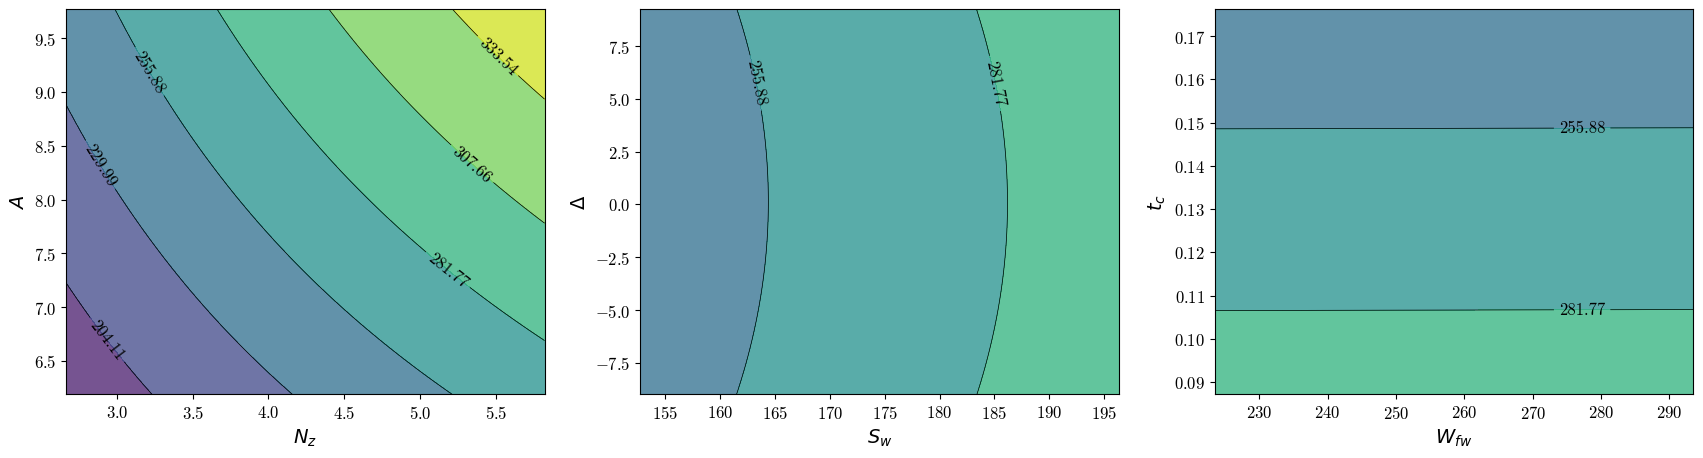

In [17]:
%%time
model = sm
X = X_tr
features = [(7, 2), (0, 3), (1, 6)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    grid_resolution=100, 
    kind='both',
    feature_names=feature_names,
)
pdd_fig_2d = pdd.plot()
pdd_fig_2d